In [41]:
#1Project Title: EDA on Retail
#Sales Data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
menu = pd.read_csv('Downloads\menu.csv')
sales = pd.read_csv('Downloads/retail_sales_dataset.csv')
menu.head()
sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [78]:
menu.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [79]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [80]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [81]:
sales.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [82]:
menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [83]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [84]:
menu.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [85]:
sales.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [86]:
menu.dropna(inplace=True)
sales.dropna(inplace=True)

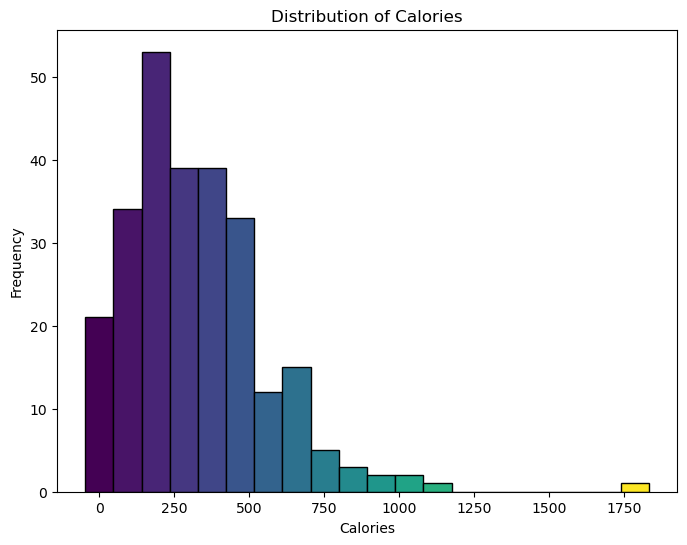

In [87]:
counts,bins = np.histogram(menu['Calories'],bins = 20)
colors = plt.cm.viridis(np.linspace(0,1,len(counts)))
plt.figure(figsize=(8,6))
for count,x,color in zip(counts,bins[:-1],colors):
    plt.bar(x,count,width=np.diff(bins)[0],color = color,edgecolor = 'black')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

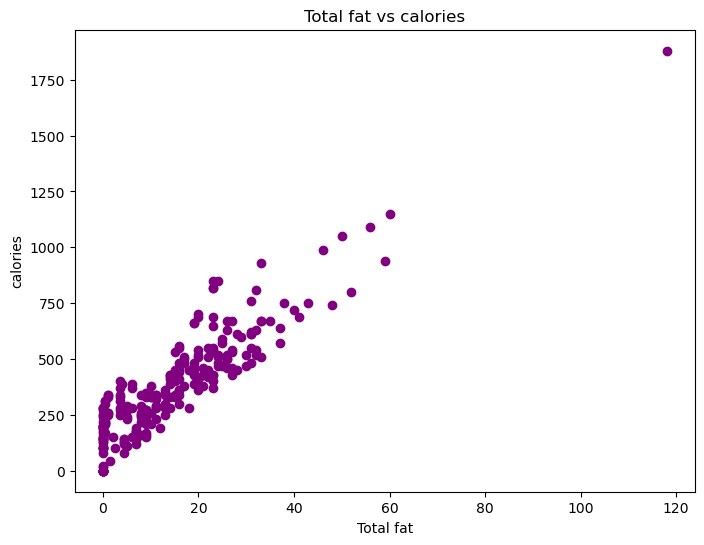

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(menu['Total Fat'],menu['Calories'],color='purple')
plt.title('Total fat vs calories')
plt.xlabel('Total fat')
plt.ylabel('calories')
plt.show()

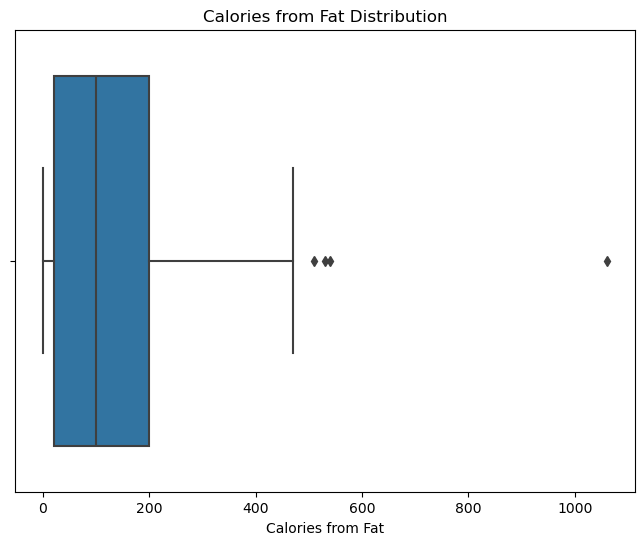

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(x=menu['Calories from Fat'])
plt.title('Calories from Fat Distribution')
plt.show()

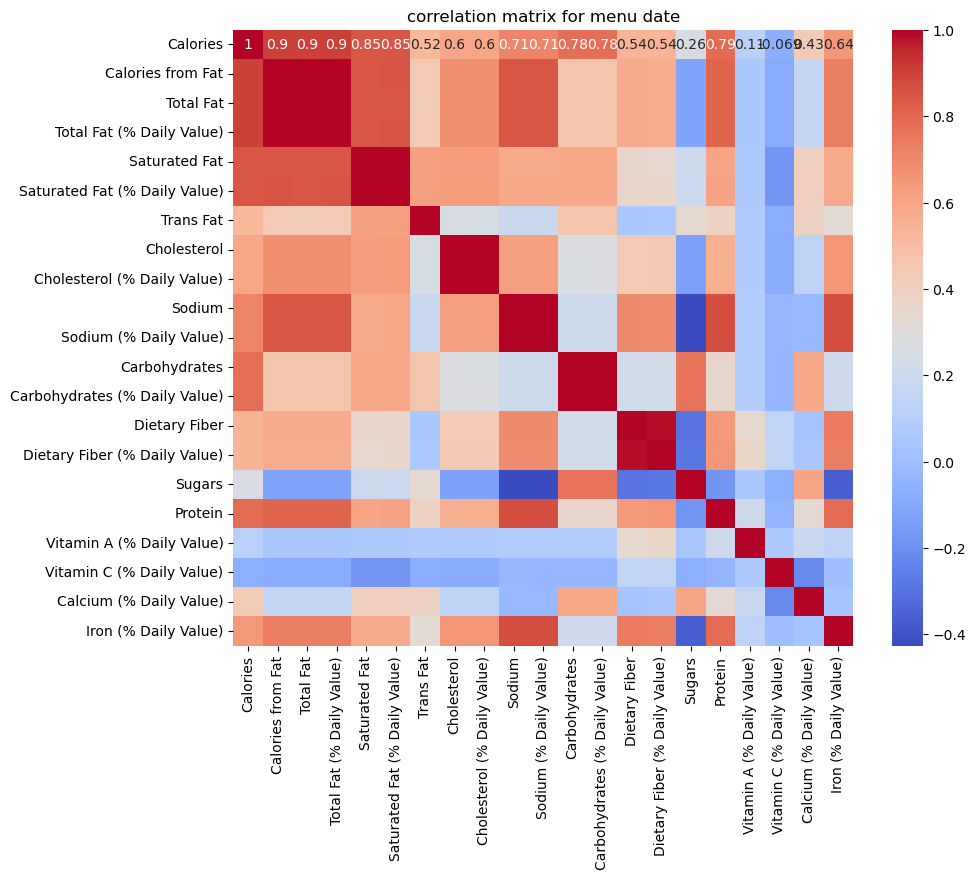

In [90]:
numeric_menu=menu.select_dtypes(include=['float64','int64'])
correlation_matrix = numeric_menu.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot = True,cmap='coolwarm')
plt.title('correlation matrix for menu date')
plt.show()

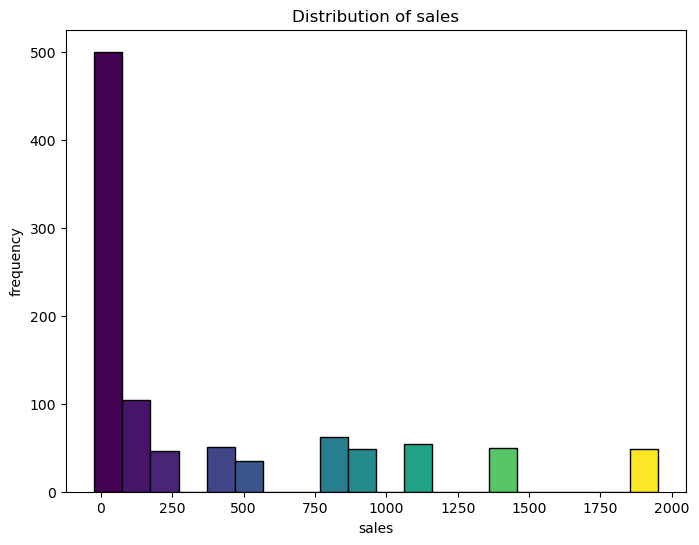

In [91]:
counts,bins = np.histogram(sales['Total Amount'],bins=20)
colors = plt.cm.viridis(np.linspace(0,1,len(counts)))
plt.figure(figsize=(8,6))
for count,x,color in zip(counts,bins[:-1],colors):
    plt.bar(x,count,width=np.diff(bins)[0],color = color,edgecolor = 'black')
plt.title('Distribution of sales')
plt.xlabel('sales')
plt.ylabel('frequency')
plt.show()    

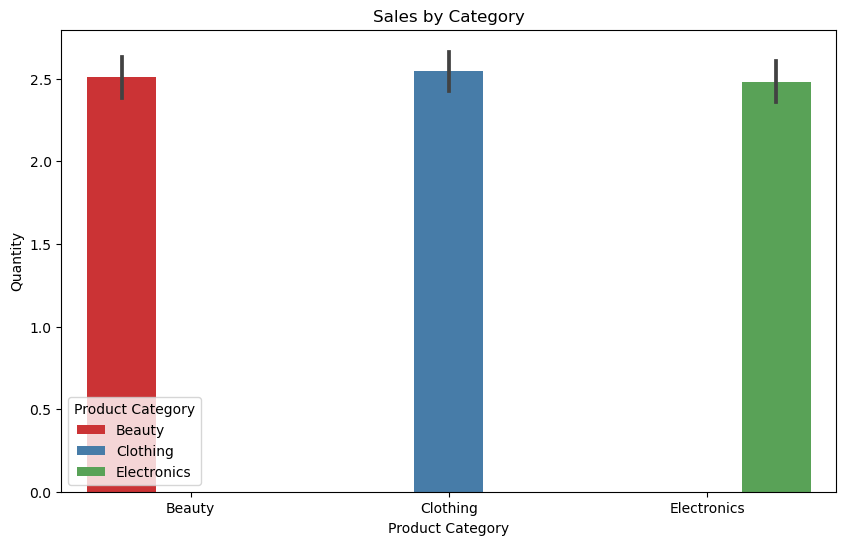

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(x='Product Category',y='Quantity',hue='Product Category',data=sales,palette='Set1')
plt.title('Sales by Category')
plt.show()

In [93]:
print(sales.head())
print(sales.info())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   obj

In [94]:
print(sales['Total Amount'].isnull().sum())
print(sales['Quantity'].isnull().sum())

0
0


In [95]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [96]:
pip install plotly --upgrade

Note: you may need to restart the kernel to use updated packages.


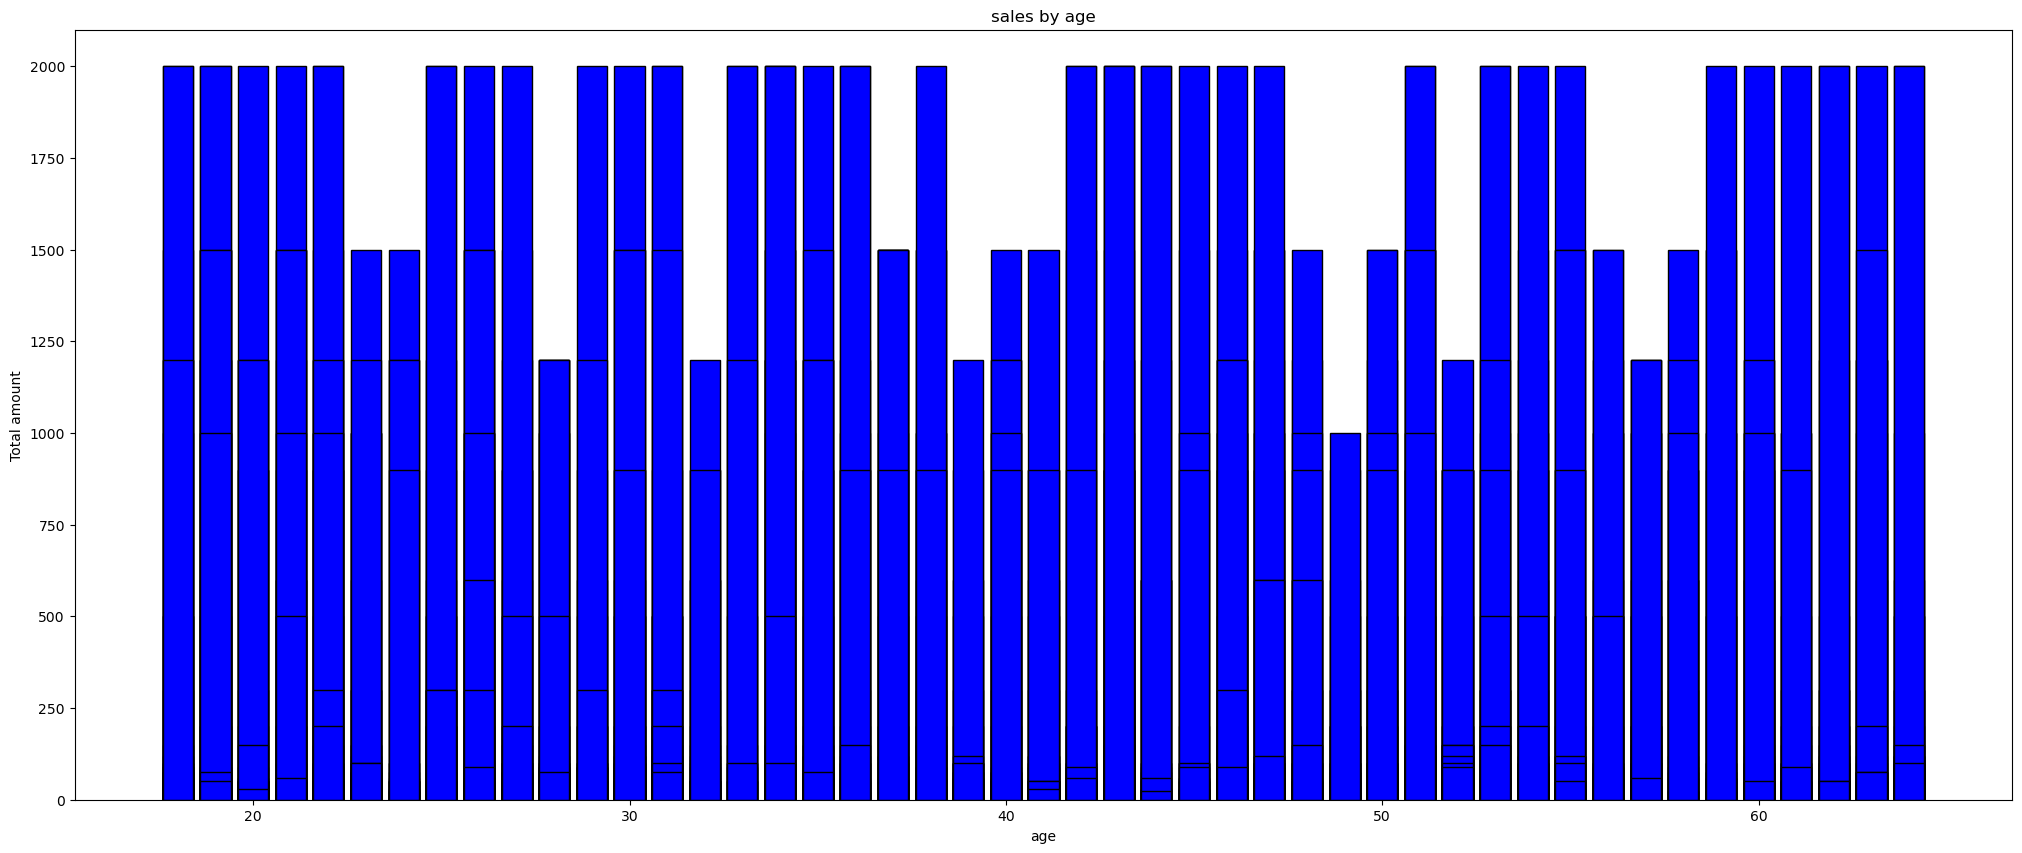

In [97]:
plt.figure(figsize=(25,10))
plt.bar(sales['Age'],sales['Total Amount'],color = 'blue',edgecolor = 'black')
plt.title('sales by age')
plt.xlabel('age')
plt.ylabel('Total amount')
plt.show()

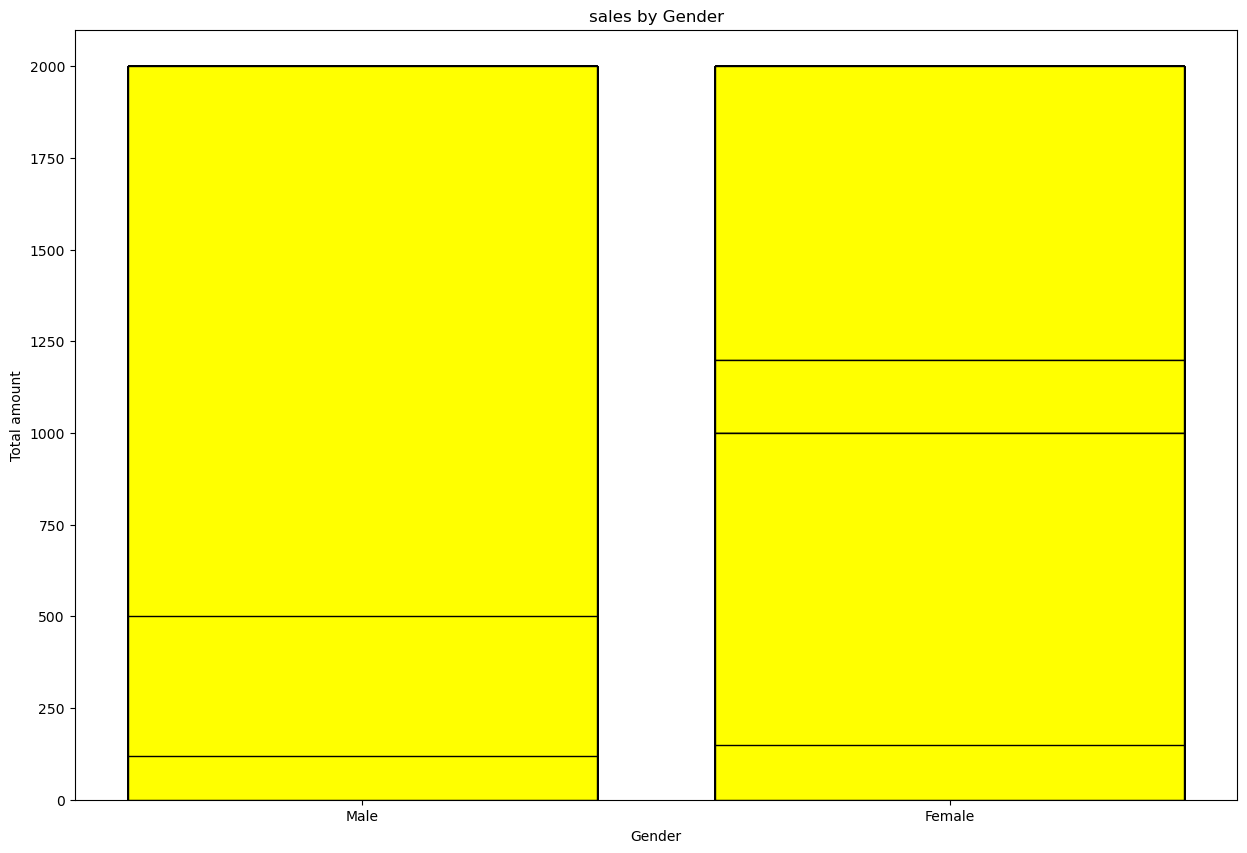

In [98]:
plt.figure(figsize=(15,10))
plt.bar(sales['Gender'],sales['Total Amount'],color = 'yellow',edgecolor = 'black')
plt.title('sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total amount')
plt.show()

In [99]:
# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(sales.describe())

# Central tendency
mean_sales = sales['Total Amount'].mean()
median_sales = sales['Total Amount'].median()
mode_sales = sales['Total Amount'].mode()[0]
std_dev_sales = sales['Total Amount'].std()

print(f"\nMean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation: {std_dev_sales}")



Descriptive Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000

Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50
Standard Deviation: 559.997631555123


In [100]:
# Ensure 'Date' is converted to datetime format
sales['Date'] = pd.to_datetime(sales['Date'], errors='coerce')

# Check for invalid dates that couldn't be converted
if sales['Date'].isnull().sum() > 0:
    print("\nInvalid dates detected and dropped!")
    sales = sales.dropna(subset=['Date'])


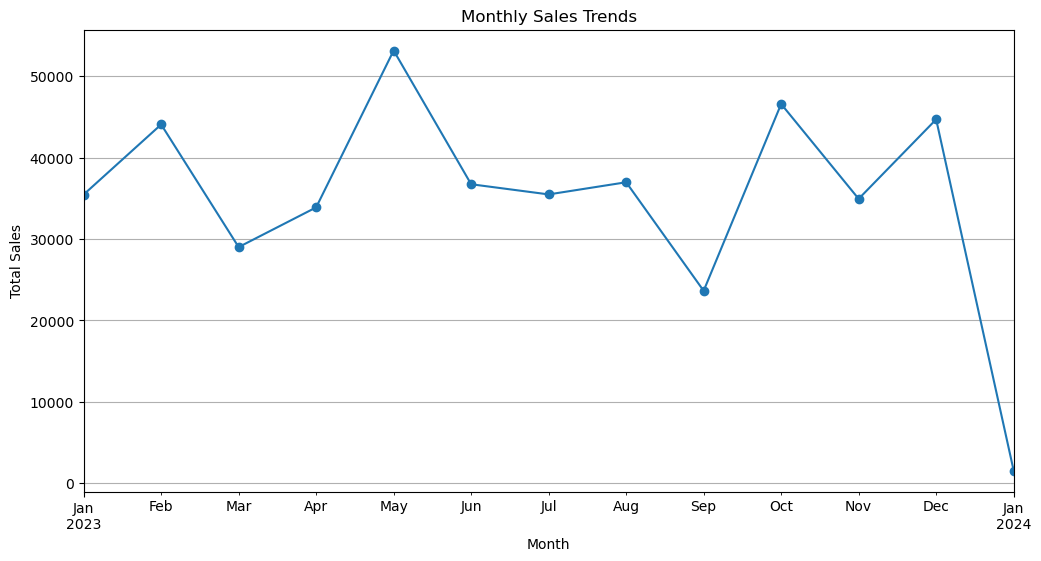

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales by month
sales['Month'] = sales['Date'].dt.to_period('M')
monthly_sales = sales.groupby('Month')['Total Amount'].sum()

# Plot sales trends over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trends')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()



Top 10 Customers:
 Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
CUST089    2000
CUST946    2000
CUST157    2000
CUST155    2000
CUST420    2000
Name: Total Amount, dtype: int64

Sales by Product Category:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


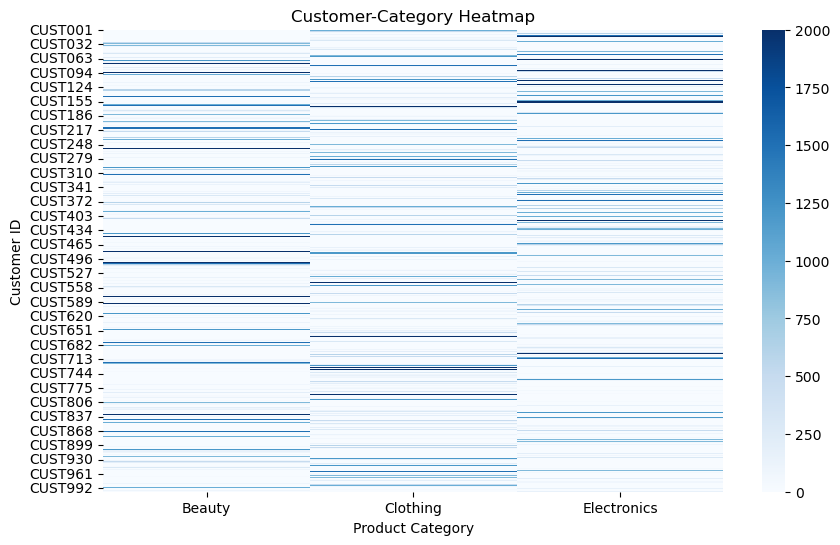

In [102]:
# Top customers by total spending
top_customers = sales.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers:\n", top_customers)

# Best-selling product categories
top_categories = sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nSales by Product Category:\n", top_categories)

# Heatmap of product-category interactions
category_customer_matrix = pd.pivot_table(sales, values='Total Amount', index='Customer ID', columns='Product Category', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(category_customer_matrix, cmap='Blues', annot=False)
plt.title("Customer-Category Heatmap")
plt.show()


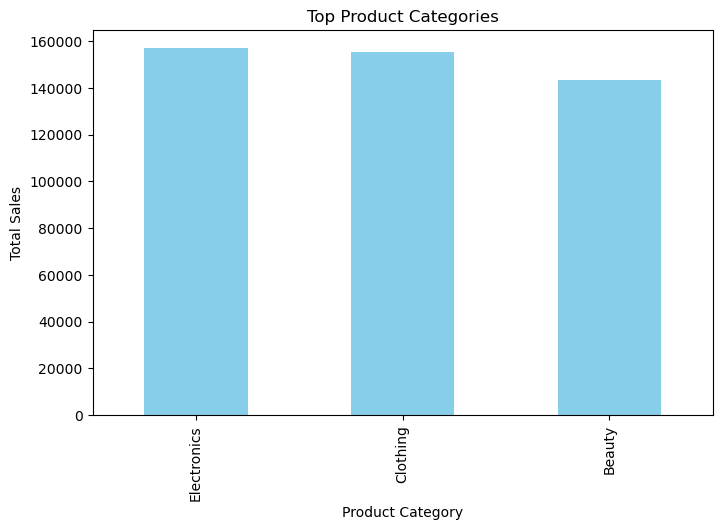

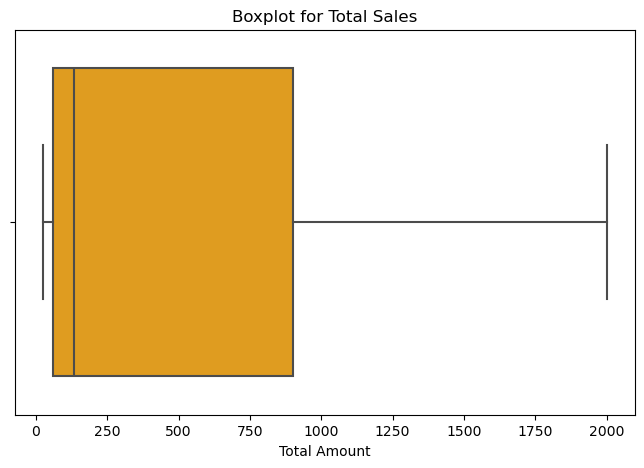

In [103]:
# Bar chart for top 5 product categories
top_categories.plot(kind='bar', title="Top Product Categories", color='skyblue', figsize=(8, 5))
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

# Boxplot for outlier detection in sales
plt.figure(figsize=(8, 5))
sns.boxplot(x=sales['Total Amount'], color='orange')
plt.title("Boxplot for Total Sales")
plt.show()


In [104]:
# Recommendations based on insights
print("Recommendations:")
print('''
1. Focus on promoting the top-selling product categories to boost sales.
2. Target the top 10 customers with personalized offers or loyalty programs.
3. Use time-series data to plan inventory for peak sales months.
4. Promote underperforming categories through discounts or bundling with best-sellers.
5. Use the customer-product heatmap to create targeted marketing campaigns.''')


Recommendations:

1. Focus on promoting the top-selling product categories to boost sales.
2. Target the top 10 customers with personalized offers or loyalty programs.
3. Use time-series data to plan inventory for peak sales months.
4. Promote underperforming categories through discounts or bundling with best-sellers.
5. Use the customer-product heatmap to create targeted marketing campaigns.


In [105]:
# Basic descriptive statistics
print(menu.describe())

# Central Tendency: Mean, Median, Mode of Calories
mean_calories = menu['Calories'].mean()
median_calories = menu['Calories'].median()
mode_calories = menu['Calories'].mode()[0]

print(f"Mean Calories: {mean_calories}")
print(f"Median Calories: {median_calories}")
print(f"Mode Calories: {mode_calories}")

# Dispersion: Standard Deviation, Variance
std_calories = menu['Calories'].std()
variance_calories = menu['Calories'].var()

print(f"Standard Deviation: {std_calories}")
print(f"Variance: {variance_calories}")


          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

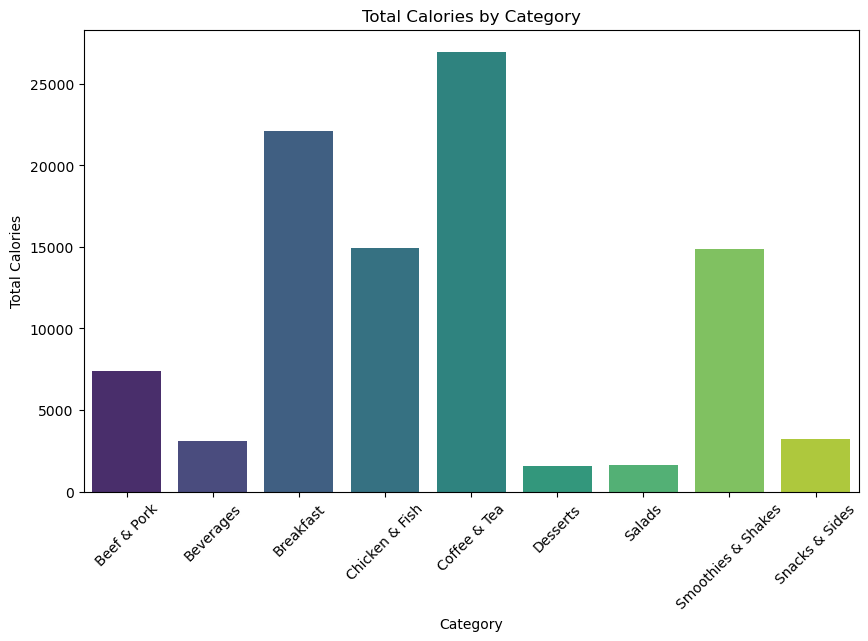

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total calories per category
category_trend = menu.groupby('Category')['Calories'].sum()

# Plot category trends
plt.figure(figsize=(10, 6))
sns.barplot(x=category_trend.index, y=category_trend.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Calories by Category")
plt.ylabel("Total Calories")
plt.xlabel("Category")
plt.show()


Top 5 High-Calorie Items:
                                                 Item  Calories
82                       Chicken McNuggets (40 piece)      1880
32        Big Breakfast with Hotcakes (Large Biscuit)      1150
31      Big Breakfast with Hotcakes (Regular Biscuit)      1090
34  Big Breakfast with Hotcakes and Egg Whites (La...      1050
33  Big Breakfast with Hotcakes and Egg Whites (Re...       990


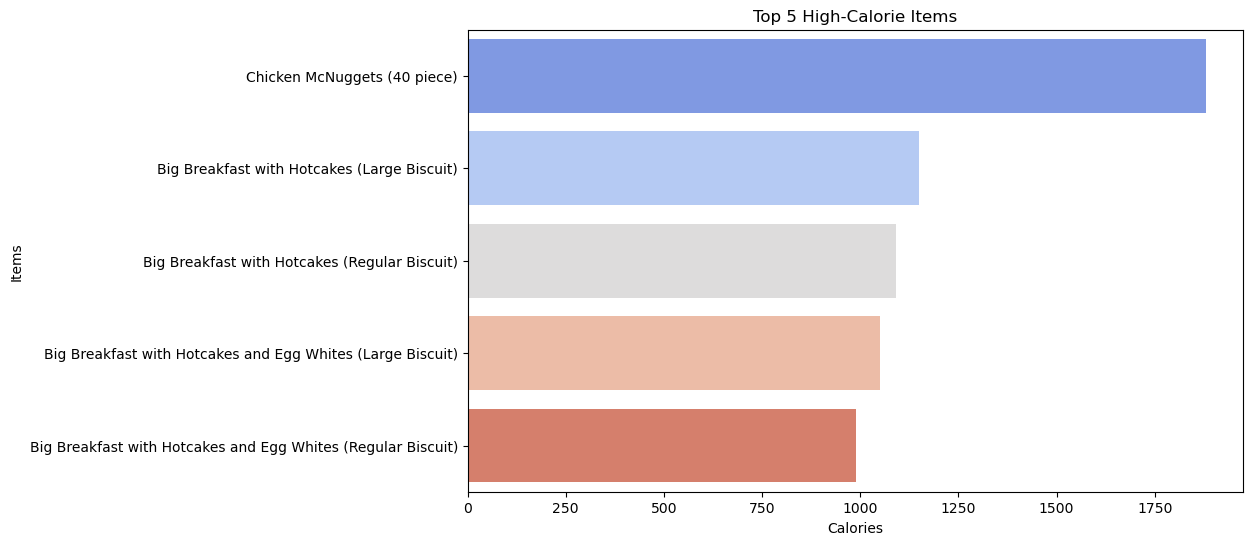

In [107]:
# Top 5 items with highest calories
top_items = menu[['Item', 'Calories']].sort_values(by='Calories', ascending=False).head()

print("Top 5 High-Calorie Items:")
print(top_items)

# Bar chart of top 5 items
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items['Calories'], y=top_items['Item'], palette="coolwarm")
plt.title("Top 5 High-Calorie Items")
plt.xlabel("Calories")
plt.ylabel("Items")
plt.show()


C:\Users\LENOVO\.anaconda\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



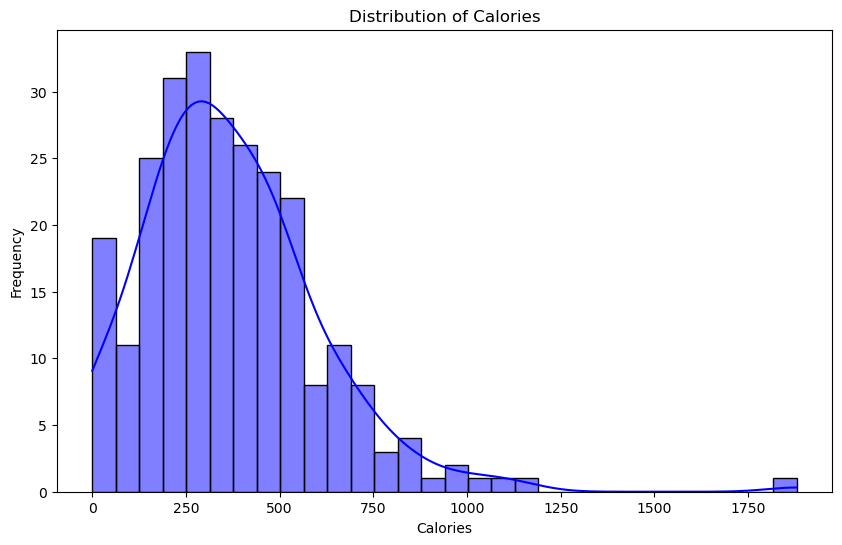

ValueError: could not convert string to float: 'Breakfast'

<Figure size 1200x800 with 0 Axes>

In [108]:
# Distribution of Calories
plt.figure(figsize=(10, 6))
sns.histplot(menu['Calories'], bins=30, kde=True, color='blue')
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

# Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(menu.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Nutritional Information")
plt.show()


In [109]:
print("Insights and Recommendations:")
print('''1. Focus on popular categories like Breakfast or Beverages with high calorie contributions.
2. Promote lower-calorie alternatives for health-conscious customers.
3. Highlight top-selling items with balanced nutritional values.
4. Use insights for targeted marketing and promotions.
5. Add more variety to underperforming categories to balance sales.''')


Insights and Recommendations:
1. Focus on popular categories like Breakfast or Beverages with high calorie contributions.
2. Promote lower-calorie alternatives for health-conscious customers.
3. Highlight top-selling items with balanced nutritional values.
4. Use insights for targeted marketing and promotions.
5. Add more variety to underperforming categories to balance sales.
